#**Prerequisites: Check the platform, OS, and Python version**

In [1]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2200.000
BogoMIPS:            4400.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [2]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [3]:
!python --version

Python 3.6.9


#**Part 1: Install Intel Distribution of OpenVINO Toolkit**

In [4]:
!wget https://apt.repos.intel.com/openvino/2020/GPG-PUB-KEY-INTEL-OPENVINO-2020

--2020-11-09 02:34:14--  https://apt.repos.intel.com/openvino/2020/GPG-PUB-KEY-INTEL-OPENVINO-2020
Resolving apt.repos.intel.com (apt.repos.intel.com)... 104.81.176.228, 2600:1409:d000:584::4b23, 2600:1409:d000:5a0::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|104.81.176.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2020’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2020-11-09 02:34:14 (35.6 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2020’ saved [939/939]



In [5]:
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2020

OK


In [6]:
!touch /etc/apt/sources.list.d/intel-openvino-2020.list

In [7]:
!echo "deb https://apt.repos.intel.com/openvino/2020 all main" >> /etc/apt/sources.list.d/intel-openvino-2020.list

In [8]:
!apt update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://apt.repos.intel.com/openvino/2020 all InRelease [5,659 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.3 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 https://apt.repos.intel.com/open

In [9]:
!apt install intel-openvino-dev-ubuntu18-2020.3.194

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  intel-openvino-dl-workbench-2020.3.194 intel-openvino-docs-2020.3.194
  intel-openvino-eula-2020.3.194
  intel-openvino-gstreamer-rt-ubuntu-bionic-2020.3.194
  intel-openvino-gva-dev-ubuntu-bionic-2020.3.194
  intel-openvino-gva-rt-ubuntu-bionic-2020.3.194
  intel-openvino-gva-sdk-2020.3.194
  intel-openvino-ie-bin-python-tools-ubuntu-bionic-2020.3.194
  intel-openvino-ie-rt-2020.3.194
  intel-openvino-ie-rt-core-ubuntu-bionic-2020.3.194
  intel-openvino-ie-rt-cpu-ubuntu-bionic-2020.3.194
  intel-openvino-ie-rt-gna-ubuntu-bionic-2020.3.194
  intel-openvino-ie-rt-gpu-ubuntu-bionic-2020.3.194
  intel-openvino-ie-rt-hddl-ubuntu-bionic-2020.3.194
  intel-openvino-ie-rt-vpu-ubuntu-bionic-2020.3.194
  intel-openvino-ie-samples-2020.3.194
  intel-openvino-ie-sdk-ubuntu-bionic-2020.3.194
  intel-openvino-model-optimizer-2020.3.194 intel-openvino

In [10]:
!ls /opt/intel

openvino  openvino_2020.3.194


The version of OpenVINO should be **2020.3.194**

#**Part 2: Quick Start in 3 Steps - Build, Optimize, and Deploy**

##**2.1: Build**

Always be sure to source the OpenVINO environment at the beginning

In [11]:
!source /opt/intel/openvino/bin/setupvars.sh

[setupvars.sh] OpenVINO environment initialized


To get the model by running downloader.py

In [12]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name mobilenet-v1-1.0-224

[setupvars.sh] OpenVINO environment initialized
################|| Downloading models ||################

========== Downloading /content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.prototxt
... 100%, 27 KB, 89537 KB/s, 0 seconds passed

========== Downloading /content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.caffemodel
... 100%, 16627 KB, 33523 KB/s, 0 seconds passed

################|| Post-processing ||################



##**2.2: Optimize**

In [13]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/converter.py --name mobilenet-v1-1.0-224

[setupvars.sh] OpenVINO environment initialized
========= Converting mobilenet-v1-1.0-224 to IR (FP16)
Conversion command: /usr/bin/python3 -- /opt/intel/openvino_2020.3.194/deployment_tools/model_optimizer/mo.py --framework=caffe --data_type=FP16 --output_dir=/content/public/mobilenet-v1-1.0-224/FP16 --model_name=mobilenet-v1-1.0-224 '--input_shape=[1,3,224,224]' --input=data '--mean_values=data[103.94,116.78,123.68]' '--scale_values=data[58.8235294117647]' --output=prob --input_model=/content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.caffemodel --input_proto=/content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.prototxt

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/public/mobilenet-v1-1.0-224/mobilenet-v1-1.0-224.caffemodel
	- Path for generated IR: 	/content/public/mobilenet-v1-1.0-224/FP16
	- IR output name: 	mobilenet-v1-1.0-224
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	data
	- Output

##**2.3: Deploy**

Import OpenCV and matplotlib libraries

In [14]:
import cv2
import matplotlib.pyplot as plt

Read and show the image

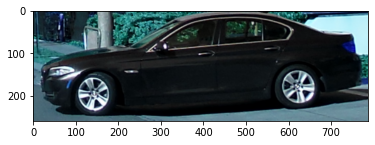

In [15]:
img = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car.png')
plt.figure()
plt.imshow(img)

Write the code

In [16]:
!touch /content/quickstart.py && rm /content/quickstart.py && touch /content/quickstart.py && \
echo "import cv2" >> /content/quickstart.py && \
echo "import numpy as np" >> /content/quickstart.py && \
echo "from openvino.inference_engine import IENetwork, IECore" >> /content/quickstart.py && \
echo "ie = IECore()"  >> /content/quickstart.py && \
echo "net = IENetwork(model='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml', weights='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.bin')" >> /content/quickstart.py && \
echo "input_blob = next(iter(net.inputs))" >> /content/quickstart.py && \
echo "out_blob = next(iter(net.outputs))" >> /content/quickstart.py && \
echo "batch,channel,height,width  = net.inputs[input_blob].shape" >> /content/quickstart.py && \
echo "image = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car.png')" >> /content/quickstart.py && \
echo "#cv2.imshow("input", image)" >> /content/quickstart.py && \
echo "image = cv2.resize(image, (width, height))" >> /content/quickstart.py && \
echo "image = image.transpose((2, 0, 1))  # Change data layout from HWC to CHW" >> /content/quickstart.py && \
echo "exec_net = ie.load_network(network=net, device_name='CPU')" >> /content/quickstart.py && \
echo "res = exec_net.infer(inputs={input_blob: image})" >> /content/quickstart.py && \
echo "idx = np.argsort(np.squeeze(res[out_blob][0]))[::-1]" >> /content/quickstart.py && \
echo "for i in range(5):" >> /content/quickstart.py && \
echo " print(idx[i]+1, res[out_blob][0][idx[i]])" >> /content/quickstart.py

In [17]:
!cat /content/quickstart.py

import cv2
import numpy as np
from openvino.inference_engine import IENetwork, IECore
ie = IECore()
net = IENetwork(model='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml', weights='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.bin')
input_blob = next(iter(net.inputs))
out_blob = next(iter(net.outputs))
batch,channel,height,width  = net.inputs[input_blob].shape
image = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car.png')
#cv2.imshow(input, image)
image = cv2.resize(image, (width, height))
image = image.transpose((2, 0, 1))  # Change data layout from HWC to CHW
exec_net = ie.load_network(network=net, device_name='CPU')
res = exec_net.infer(inputs={input_blob: image})
idx = np.argsort(np.squeeze(res[out_blob][0]))[::-1]
for i in range(5):
 print(idx[i]+1, res[out_blob][0][idx[i]])


Perform the inference

In [18]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python /content/quickstart.py

[setupvars.sh] OpenVINO environment initialized
/content/quickstart.py:5: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  net = IENetwork(model='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml', weights='/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.bin')
818 [[0.42420408]]
512 [[0.27280593]]
480 [[0.13300343]]
437 [[0.0699498]]
752 [[0.03396042]]


In [19]:
!source /opt/intel/openvino/bin/setupvars.sh && \
sed -n '818p' /opt/intel/openvino/deployment_tools/demo/squeezenet1.1.labels 

[setupvars.sh] OpenVINO environment initialized
sports car, sport car


#**Part 3: Practice - Execute Image Classification**

In [20]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python3 /opt/intel/openvino/inference_engine/samples/python/classification_sample/classification_sample.py -h

[setupvars.sh] OpenVINO environment initialized
usage: classification_sample.py [-h] -m MODEL -i INPUT [INPUT ...]
                                [-l CPU_EXTENSION] [-d DEVICE]
                                [--labels LABELS] [-nt NUMBER_TOP]

Options:
  -h, --help            Show this help message and exit.
  -m MODEL, --model MODEL
                        Required. Path to an .xml file with a trained model.
  -i INPUT [INPUT ...], --input INPUT [INPUT ...]
                        Required. Path to a folder with images or path to an
                        image files
  -l CPU_EXTENSION, --cpu_extension CPU_EXTENSION
                        Optional. Required for CPU custom layers. MKLDNN
                        (CPU)-targeted custom layers. Absolute path to a
                        shared library with the kernels implementations.
  -d DEVICE, --device DEVICE
                        Optional. Specify the target device to infer on; CPU,
                        GPU, FPGA, HDDL, MYRIA

**To do: Execute the classification_sample.py demo** </br>
Hint: </br>
(1) Model path: /content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml </br>
(2) Input path: /opt/intel/openvino/deployment_tools/demo/car.png </br>
(3) Label path: /opt/intel/openvino/deployment_tools/demo/squeezenet1.1.labels

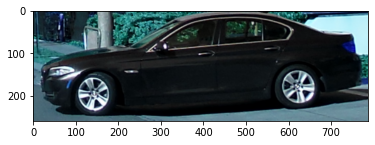

In [21]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car.png')
plt.figure()
plt.imshow(img)

In [22]:
# Your code here
!source /opt/intel/openvino/bin/setupvars.sh && \
python3 /opt/intel/openvino/inference_engine/samples/python/classification_sample/classification_sample.py \
-m /content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml \
-i /opt/intel/openvino/deployment_tools/demo/car.png \
--labels  /opt/intel/openvino/deployment_tools/demo/squeezenet1.1.labels

[setupvars.sh] OpenVINO environment initialized
[ INFO ] Creating Inference Engine
[ INFO ] Loading network files:
	/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.xml
	/content/public/mobilenet-v1-1.0-224/FP16/mobilenet-v1-1.0-224.bin
[ INFO ] Preparing input blobs
[ WARNING ] Image /opt/intel/openvino/deployment_tools/demo/car.png is resized from (259, 787) to (224, 224)
[ INFO ] Batch size is 1
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference in synchronous mode
[ INFO ] Processing output blob
[ INFO ] Top 10 results: 
Image /opt/intel/openvino/deployment_tools/demo/car.png

classid probability
------- -----------
car, sport car0.4242041
convertible0.2728059
 wheel   0.1330034
wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon 0.0699498
race car, racing car0.0339604
radiator grille0.0263465
pickup truck0.0155464
hack, taxi, taxicab0.0127090
minivan  0.0051457
   T     0.0018786


[ INFO ] This sample is an API example, for an

You should be able to see the following, if successful:</br></br>

classid probability
------- -----------
car, sport car0.4242041
convertible0.2728059
 wheel   0.1330034
wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon 0.0699498
race car, racing car0.0339604
radiator grille0.0263465
pickup truck0.0155464
hack, taxi, taxicab0.0127090
minivan  0.0051457
   T     0.0018786


[ INFO ] This sample is an API example, for any performance measurements please use the dedicated benchmark_app tool

#**Part 4: Challenge - Perform Object Detection with mobilenet SSD**

First, let's check out the image to be inferenced.

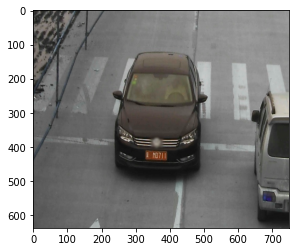

In [23]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/opt/intel/openvino/deployment_tools/demo/car_1.bmp')
plt.figure()
plt.imshow(img)

##**Step 1: Build**
To get the model by using model downloader from DL deployment toolkit.
</br>Note: Make sure to have OpenVINO environment initialized.
</br>Model name: **mobilenet-ssd**


In [24]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py \
--name mobilenet-ssd

[setupvars.sh] OpenVINO environment initialized
################|| Downloading models ||################

========== Downloading /content/public/mobilenet-ssd/mobilenet-ssd.prototxt
... 100%, 28 KB, 81357 KB/s, 0 seconds passed

========== Downloading /content/public/mobilenet-ssd/mobilenet-ssd.caffemodel
... 100%, 22605 KB, 45110 KB/s, 0 seconds passed

################|| Post-processing ||################



##**Step 2: Optimize**

In [25]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python /opt/intel/openvino/deployment_tools/tools/model_downloader/converter.py \
--name mobilenet-ssd

[setupvars.sh] OpenVINO environment initialized
========= Converting mobilenet-ssd to IR (FP16)
Conversion command: /usr/bin/python3 -- /opt/intel/openvino_2020.3.194/deployment_tools/model_optimizer/mo.py --framework=caffe --data_type=FP16 --output_dir=/content/public/mobilenet-ssd/FP16 --model_name=mobilenet-ssd '--input_shape=[1,3,300,300]' --input=data '--mean_values=data[127.5,127.5,127.5]' '--scale_values=data[127.5]' --output=detection_out --input_model=/content/public/mobilenet-ssd/mobilenet-ssd.caffemodel --input_proto=/content/public/mobilenet-ssd/mobilenet-ssd.prototxt

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/content/public/mobilenet-ssd/mobilenet-ssd.caffemodel
	- Path for generated IR: 	/content/public/mobilenet-ssd/FP16
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	data
	- Output layers: 	detection_out
	- Input shapes: 	[1,3,300,300]
	- Mean values: 	data[127.

##**Step 3: Deploy**
Path to this app: /opt/intel/openvino/inference_engine/samples/python/object_detection_sample_ssd/object_detection_sample_ssd.py</br>
Usage:

In [26]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python3 /opt/intel/openvino/inference_engine/samples/python/object_detection_sample_ssd/object_detection_sample_ssd.py

[setupvars.sh] OpenVINO environment initialized
usage: object_detection_sample_ssd.py [-h] -m MODEL -i INPUT [INPUT ...]
                                      [-l CPU_EXTENSION] [-d DEVICE]
                                      [--labels LABELS] [-nt NUMBER_TOP]
object_detection_sample_ssd.py: error: the following arguments are required: -m/--model, -i/--input


In [27]:
!source /opt/intel/openvino/bin/setupvars.sh && \
python3 /opt/intel/openvino/inference_engine/samples/python/object_detection_sample_ssd/object_detection_sample_ssd.py \
-m /content/public/mobilenet-ssd/FP16/mobilenet-ssd.xml \
-i /opt/intel/openvino/deployment_tools/demo/car_1.bmp \
--labels /opt/intel/openvino/deployment_tools/inference_engine/samples/python/voc_labels.txt

[setupvars.sh] OpenVINO environment initialized
[ INFO ] Loading Inference Engine
[ INFO ] Loading network files:
	/content/public/mobilenet-ssd/FP16/mobilenet-ssd.xml
	/content/public/mobilenet-ssd/FP16/mobilenet-ssd.bin
[ INFO ] Device info:
        CPU
        MKLDNNPlugin version ......... 2.1
        Build ........... 2020.3.0-3467-15f2c61a-releases/2020/3
inputs number: 1
input shape: [1, 3, 300, 300]
input key: data
[ INFO ] File was added: 
[ INFO ]         /opt/intel/openvino/deployment_tools/demo/car_1.bmp
[ WARNING ] Image /opt/intel/openvino/deployment_tools/demo/car_1.bmp is resized from (300, 300) to (300, 300)
[ INFO ] Preparing input blobs
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the device
[ INFO ] Creating infer request and starting inference
[ INFO ] Processing output blobs
[0,7] element, prob = 0.999999    (226,120)-(502,462) batch id : 0 WILL BE PRINTED!
[1,7] element, prob = 0.9361    (637,235)-(743,609) batch id : 0 WILL 

**Results:**</br>
We shall be able to see the object have been successfully surrounded by the bounding boxes as below.

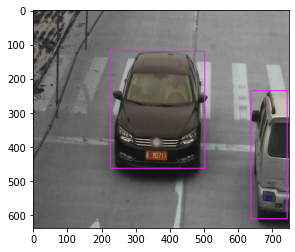

In [28]:
out_img = cv2.imread('out.bmp')
plt.figure()
plt.imshow(out_img)